In [1]:
# Importing Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Model
from keras import regularizers

In [2]:
# Importing Data
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 3072))
x_test = np.reshape(x_test, (len(x_test), 3072))

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Initializing Vanilla Autoencoders
input_img = Input(shape=(3072,))
# Add a Dense layer with a L1 activity regularizer

encoded = Dense(1024, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

2022-03-04 11:40:03.700859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 11:40:03.785255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 11:40:03.785978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 11:40:03.787102: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
# Function to compile and build the model
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0,"adagrad":0.0,"nadam":0.0,"sgd":0.0}
def train_model(input_layer,output_layer,optimizer,epochs,batch_size):
    autoencoder = Model(input_layer,output_layer)
    autoencoder.compile(optimizer=optimizer,loss = "binary_crossentropy",metrics = ["mean_squared_error"])
#     print(autoencoder.summary())
    print("With", optimizer,"optimizer")
    hist = autoencoder.fit(x_train,x_train,epochs = epochs,batch_size = batch_size,validation_data = (x_test,x_test))
    loss_dict[optimizer] = hist.history["val_loss"][-1]
    decoded_images = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_images[i].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

With adam optimizer


2022-03-04 11:40:08.300906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
391/391 [==============================] - 4s 7ms/step - loss: 0.6406 - mean_squared_error: 0.0374 - val_loss: 0.6241 - val_mean_squared_error: 0.0291
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6172 - mean_squared_error: 0.0264 - val_loss: 0.6130 - val_mean_squared_error: 0.0242
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6081 - mean_squared_error: 0.0223 - val_loss: 0.6065 - val_mean_squared_error: 0.0211
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 0.6027 - mean_squared_error: 0.0201 - val_loss: 0.6013 - val_mean_squared_error: 0.0191
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5999 - mean_squared_error: 0.0190 - val_loss: 0.5994 - val_mean_squared_error: 0.0185
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5982 - mean_squared_error: 0.0185 - val_loss: 0.5983 - val_mean_squared_error: 0.0182
Epoch 7/10
391/391 [========

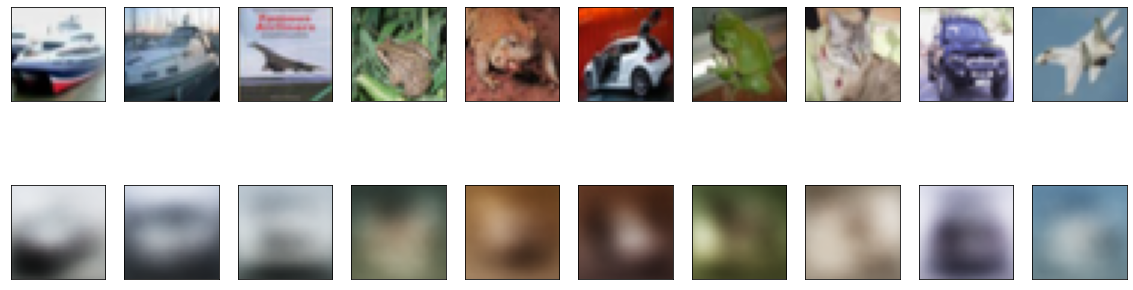

With rmsprop optimizer
Epoch 1/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6317 - mean_squared_error: 0.0338 - val_loss: 0.6174 - val_mean_squared_error: 0.0273
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6198 - mean_squared_error: 0.0288 - val_loss: 0.6202 - val_mean_squared_error: 0.0279
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 0.6158 - mean_squared_error: 0.0268 - val_loss: 0.6080 - val_mean_squared_error: 0.0226
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6135 - mean_squared_error: 0.0256 - val_loss: 0.6111 - val_mean_squared_error: 0.0243
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6116 - mean_squared_error: 0.0246 - val_loss: 0.6147 - val_mean_squared_error: 0.0251
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 0.6101 - mean_squared_error: 0.0238 - val_loss: 0.6091 - val_mean_squared_error: 0.0231
Epoch

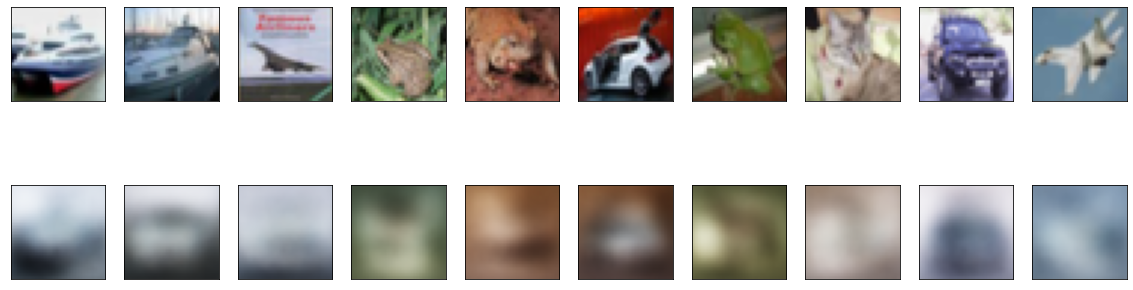

With adadelta optimizer
Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 0.6047 - mean_squared_error: 0.0213 - val_loss: 0.6038 - val_mean_squared_error: 0.0205
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6019 - mean_squared_error: 0.0200 - val_loss: 0.6022 - val_mean_squared_error: 0.0198
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6008 - mean_squared_error: 0.0195 - val_loss: 0.6015 - val_mean_squared_error: 0.0194
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6003 - mean_squared_error: 0.0193 - val_loss: 0.6011 - val_mean_squared_error: 0.0192
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5999 - mean_squared_error: 0.0191 - val_loss: 0.6008 - val_mean_squared_error: 0.0191
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5997 - mean_squared_error: 0.0190 - val_loss: 0.6006 - val_mean_squared_error: 0.0190
Epoc

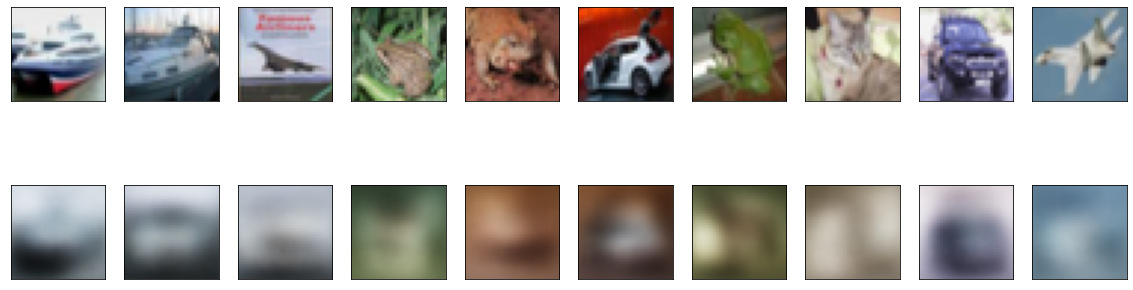

With adagrad optimizer
Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 0.5992 - mean_squared_error: 0.0187 - val_loss: 0.6001 - val_mean_squared_error: 0.0187
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5991 - mean_squared_error: 0.0186 - val_loss: 0.6000 - val_mean_squared_error: 0.0186
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5990 - mean_squared_error: 0.0185 - val_loss: 0.6000 - val_mean_squared_error: 0.0186
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5990 - mean_squared_error: 0.0185 - val_loss: 0.5999 - val_mean_squared_error: 0.0185
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5989 - mean_squared_error: 0.0185 - val_loss: 0.5999 - val_mean_squared_error: 0.0185
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5989 - mean_squared_error: 0.0185 - val_loss: 0.5999 - val_mean_squared_error: 0.0185
Epoch

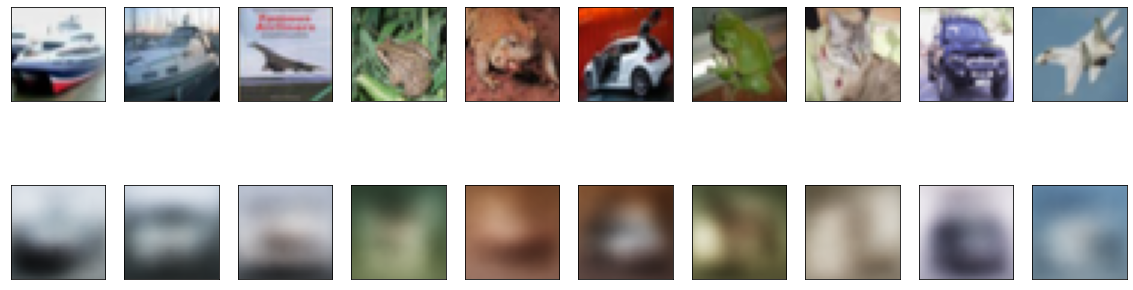

With nadam optimizer
Epoch 1/10
391/391 [==============================] - 4s 8ms/step - loss: 0.6011 - mean_squared_error: 0.0193 - val_loss: 0.6049 - val_mean_squared_error: 0.0203
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6004 - mean_squared_error: 0.0191 - val_loss: 0.6058 - val_mean_squared_error: 0.0208
Epoch 3/10
391/391 [==============================] - 3s 6ms/step - loss: 0.5998 - mean_squared_error: 0.0189 - val_loss: 0.6057 - val_mean_squared_error: 0.0209
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 0.5990 - mean_squared_error: 0.0186 - val_loss: 0.6024 - val_mean_squared_error: 0.0194
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 0.5988 - mean_squared_error: 0.0185 - val_loss: 0.5995 - val_mean_squared_error: 0.0186
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5982 - mean_squared_error: 0.0183 - val_loss: 0.5979 - val_mean_squared_error: 0.0179
Epoch 7

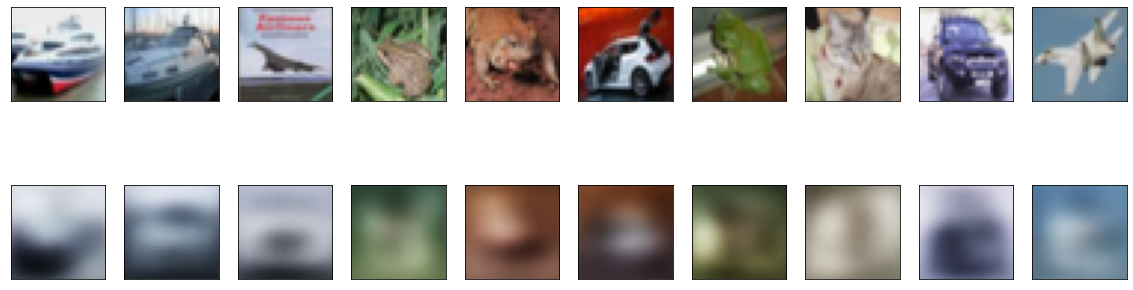

With sgd optimizer
Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 0.5947 - mean_squared_error: 0.0170 - val_loss: 0.5954 - val_mean_squared_error: 0.0169
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5944 - mean_squared_error: 0.0169 - val_loss: 0.5954 - val_mean_squared_error: 0.0169
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5944 - mean_squared_error: 0.0169 - val_loss: 0.5954 - val_mean_squared_error: 0.0169
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5944 - mean_squared_error: 0.0169 - val_loss: 0.5954 - val_mean_squared_error: 0.0169
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5944 - mean_squared_error: 0.0169 - val_loss: 0.5954 - val_mean_squared_error: 0.0169
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 0.5944 - mean_squared_error: 0.0169 - val_loss: 0.5954 - val_mean_squared_error: 0.0169
Epoch 7/1

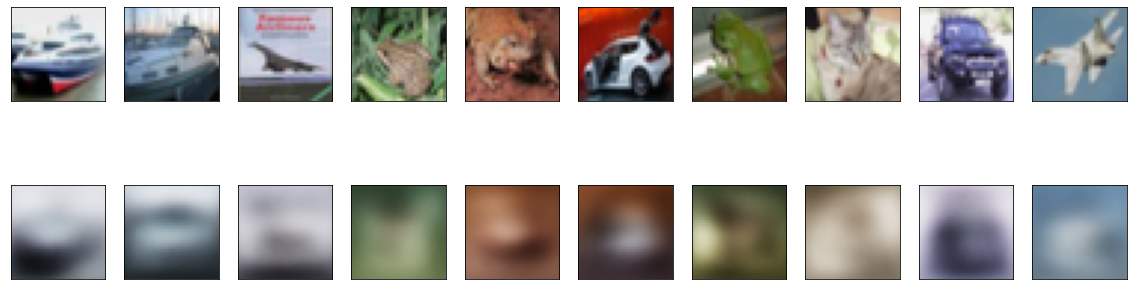

In [5]:
for i in ["adam","rmsprop","adadelta","adagrad","nadam","sgd"]:
        train_model(input_img,decoded,i,10,128)